# Marketing Allocation - Optimization

In [5]:
import numpy as np
from pyomo.environ import *
from matplotlib import pyplot as plt

# Business Case

A common problem in marketing is the allocation of ad spend. There are various "channels" that ads can be purchased in, and they all have various costs and benefits to those costs. For the purposes of this example, let's assume there are only three options - email, search, and social.

# Solving the Optimization Problem

## Ad Buying Profit

In [22]:
def sigmoid(x0, y0, c, k, x):
    '''
    Given the coefficients to a sigmoid and a value x,
    this will return the y value. Used for regression.
    '''
    y = c / (1 + np.exp(-k*(x-x0))) + y0
    return y

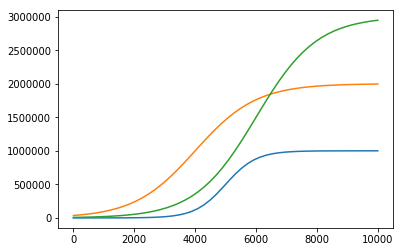

In [58]:
x = np.linspace(0,10000)
y1 = sigmoid(x0=5000, y0=0, c=1e6, k=2e-3, x=x)
y2 = sigmoid(x0=4000, y0=0, c=2e6, k=1e-3, x=x)
y3 = sigmoid(x0=6000, y0=0, c=3e6, k=1e-3, x=x)
fig, ax = plt.subplots()
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
plt.show()

## Optimization Formulation

In [8]:
# initialize the model
model = ConcreteModel()

# declare decision variables
model.email = Var(domain=NonNegativeReals)
model.social = Var(domain=NonNegativeReals)
model.search = Var(domain=NonNegativeReals)

# declare objective
model.profit = Objective(
    expr = 40*model.email,
    sense = maximize)

# constraints
model.budget = Constraint(expr = model.email <= 100)

## Optimization Solution

In [21]:
results = SolverFactory('ipopt').solve(model)
print(f"Profit = ${model.profit() :.2f}")

Profit = $4000.00
